In [1]:
#!/usr/bin/env python

In [2]:
import os
import sys
if os.path.exists('/home/chieh/code/wPlotLib'):
	sys.path.insert(0,'/home/chieh/code/wPlotLib')
if os.path.exists('/home/chieh/code/wuML'):
	sys.path.insert(0,'/home/chieh/code/wuML')

In [3]:
import wuml 
import numpy as np
import scipy.stats
import pandas as pd
from scipy.stats.stats import pearsonr  
from sklearn.preprocessing import KBinsDiscretizer
from wplotlib import histograms
from wplotlib import lines
import ppscore as pps
from sklearn.metrics.cluster import normalized_mutual_info_score
import matplotlib.pyplot as plt

In [4]:
n = 300

Perfect Linear Data

In [5]:
dat = np.random.rand(n,1)
plinear_data = np.hstack((dat,dat)) + 1
df = pd.DataFrame(data=plinear_data, columns=["x", "y"])

In [6]:
enc = KBinsDiscretizer(n_bins=10, encode='ordinal')
XP_data_nmi = np.squeeze(enc.fit_transform(np.atleast_2d(plinear_data[:,0]).T))
enc = KBinsDiscretizer(n_bins=10, encode='ordinal')
YP_data_nmi = np.squeeze(enc.fit_transform(np.atleast_2d(plinear_data[:,1]).T))

In [7]:
plinear_pc = np.round(pearsonr(plinear_data[:,0], plinear_data[:,1])[0], 2)
plinear_nmi = np.round(normalized_mutual_info_score(XP_data_nmi, YP_data_nmi),2)
plinear_hsic = np.round(wuml.HSIC(plinear_data[:,0], plinear_data[:,1], sigma_type='mpd'),2)	
plinear_pps = np.round(pps.score(df, "x", "y")['ppscore'],2)

In [8]:
wuml.jupyter_print('Linear Relationship:')
wuml.jupyter_print('\tCorrelation : %.3f'% plinear_pc)
wuml.jupyter_print('\tNMI : %.3f'% plinear_nmi)
wuml.jupyter_print('\tpps : %.3f'% plinear_pps)
wuml.jupyter_print('\tHSIC : %.3f'% plinear_hsic)

Linear Relationship:
	Correlation : 1.000
	NMI : 1.000
	pps : 0.990
	HSIC : 1.000


Linear Data

In [9]:
dat = np.random.rand(n,1)
linear_data = np.hstack((dat,dat)) + 0.04*np.random.randn(n,2)
df = pd.DataFrame(data=linear_data, columns=["x", "y"])

In [10]:
enc = KBinsDiscretizer(n_bins=10, encode='ordinal')
XL_data_nmi = np.squeeze(enc.fit_transform(np.atleast_2d(linear_data[:,0]).T))
enc = KBinsDiscretizer(n_bins=10, encode='ordinal')
YL_data_nmi = np.squeeze(enc.fit_transform(np.atleast_2d(linear_data[:,1]).T))

In [11]:
linear_pc = np.round(pearsonr(linear_data[:,0], linear_data[:,1])[0], 2)
linear_nmi = np.round(normalized_mutual_info_score(XL_data_nmi, YL_data_nmi),2)
linear_hsic = np.round(wuml.HSIC(linear_data[:,0], linear_data[:,1], sigma_type='opt'),2)	
linear_pps = np.round(pps.score(df, "x", "y")['ppscore'],2)

In [12]:
wuml.jupyter_print('Linear Relationship:')
wuml.jupyter_print('\tCorrelation : %.3f'% linear_pc)
wuml.jupyter_print('\tNMI : %.3f'% linear_nmi)
wuml.jupyter_print('\tpps : %.3f'% linear_pps)
wuml.jupyter_print('\tHSIC : %.3f'% linear_hsic)

Linear Relationship:
	Correlation : 0.980
	NMI : 0.620
	pps : 0.760
	HSIC : 0.910


Sine Data

In [13]:
dat_x = 9.3*np.random.rand(n,1)
dat_y = np.sin(dat_x)
sine_data = np.hstack((dat_x,dat_y)) + 0.10*np.random.randn(n,2)
df = pd.DataFrame(data=sine_data, columns=["x", "y"])
sine_pc = np.round(pearsonr(sine_data[:,0], sine_data[:,1])[0],2)

In [14]:
enc = KBinsDiscretizer(n_bins=10, encode='ordinal')
Xsine_data_nmi = np.squeeze(enc.fit_transform(np.atleast_2d(sine_data[:,0]).T))
enc = KBinsDiscretizer(n_bins=10, encode='ordinal')
Ysine_data_nmi = np.squeeze(enc.fit_transform(np.atleast_2d(sine_data[:,1]).T))

In [15]:
sine_nmi = np.round(normalized_mutual_info_score(Xsine_data_nmi, Ysine_data_nmi),2)
sine_hsic = np.round(wuml.HSIC(sine_data[:,0], sine_data[:,1], sigma_type='opt'),2)
sine_pps = np.round(pps.score(df, "x", "y")['ppscore'],2)

In [16]:
wuml.jupyter_print('Sine Relationship:')
wuml.jupyter_print('\tCorrelation : %.3f'% sine_pc)
wuml.jupyter_print('\tNMI : %.3f'%sine_nmi)
wuml.jupyter_print('\tpps : %.3f'%sine_pps)
wuml.jupyter_print('\tHSIC : %.3f'%sine_hsic)

Sine Relationship:
	Correlation : -0.040
	NMI : 0.440
	pps : 0.760
	HSIC : 0.500


Parabola Data

In [17]:
dat_x = 4*np.random.rand(n,1) - 2
dat_y = 0.05*dat_x*dat_x
para_data = np.hstack((dat_x,dat_y)) #+ 0.01*np.random.randn(n,2)
df = pd.DataFrame(data=para_data, columns=["x", "y"])

In [18]:
enc = KBinsDiscretizer(n_bins=10, encode='ordinal')
Xp_data_nmi = np.squeeze(enc.fit_transform(np.atleast_2d(para_data[:,0]).T))
enc = KBinsDiscretizer(n_bins=10, encode='ordinal')
Yp_data_nmi = np.squeeze(enc.fit_transform(np.atleast_2d(para_data[:,1]).T))

In [19]:
para_pc = np.round(pearsonr(para_data[:,0], para_data[:,1])[0],2)
para_nmi = np.round(normalized_mutual_info_score(Xp_data_nmi, Yp_data_nmi),2)
para_hsic = np.round(wuml.HSIC(para_data[:,0], para_data[:,1], sigma_type='opt'),2)
para_pps = np.round(pps.score(df, "x", "y")['ppscore'],2)

In [20]:
wuml.jupyter_print('Parabola Relationship:')
wuml.jupyter_print('\tCorrelation : %.3f'%para_pc)
wuml.jupyter_print('\tNMI : %.3f'%para_nmi)
wuml.jupyter_print('\tpps : %.3f'%para_pps)
wuml.jupyter_print('\tHSIC : %.3f'%para_hsic)

Parabola Relationship:
	Correlation : 0.040
	NMI : 0.650
	pps : 0.980
	HSIC : 0.540


Random uniform Data

In [21]:
unif_data = np.random.rand(n,2)
df = pd.DataFrame(data=unif_data, columns=["x", "y"])

In [22]:
enc = KBinsDiscretizer(n_bins=10, encode='ordinal')
Xr_data_nmi = np.squeeze(enc.fit_transform(np.atleast_2d(unif_data[:,0]).T))
enc = KBinsDiscretizer(n_bins=10, encode='ordinal')
Yr_data_nmi = np.squeeze(enc.fit_transform(np.atleast_2d(unif_data[:,1]).T))

In [23]:
unif_pc = np.round(pearsonr(unif_data[:,0], unif_data[:,1])[0],2)
unif_hsic = np.round(wuml.HSIC(unif_data[:,0], unif_data[:,1], sigma_type='opt'),2)
unif_nmi = np.round(normalized_mutual_info_score(Xr_data_nmi, Yr_data_nmi),2)
unif_pps = np.round(pps.score(df, "x", "y")['ppscore'],2)

In [24]:
wuml.jupyter_print('Random Relationship:')
wuml.jupyter_print('\tCorrelation : %.3f'%unif_pc)
wuml.jupyter_print('\tNMI : %.3f'%unif_nmi)
wuml.jupyter_print('\tpps : %.3f'%unif_pps)
wuml.jupyter_print('\tHSIC : %.3f'%unif_hsic)

Random Relationship:
	Correlation : -0.120
	NMI : 0.060
	pps : 0.000
	HSIC : 0.030


not plotting if it is running on test mode

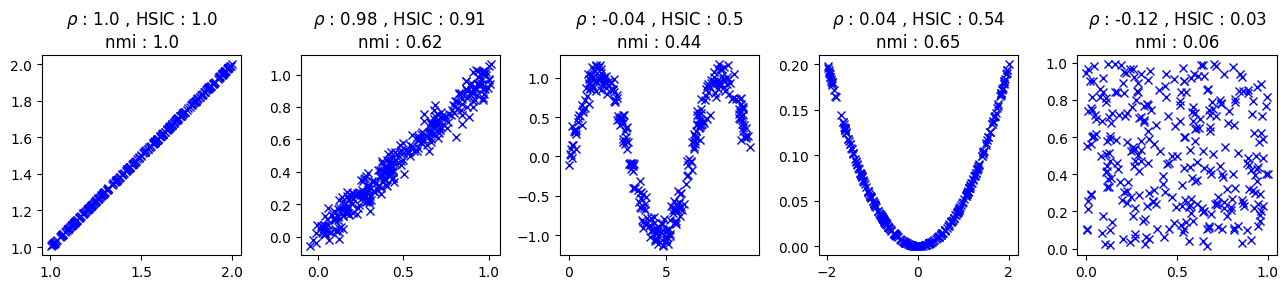

In [25]:
if wuml.get_commandLine_input()[1] != 'disabled': 
	#	plotting
	plt.figure(figsize=(13,3))
	
	plt.subplot(151)
	plt.plot(plinear_data[:,0], plinear_data[:,1], 'bx')
	plt.title('$\\rho$ : ' + str(plinear_pc) + ' , HSIC : ' + str(plinear_hsic)  + '\nnmi : ' + str(plinear_nmi))
	#plt.title('$\\rho$ : ' + str(plinear_pc) + ' , HSIC : ' + str(plinear_hsic) + '\npps : ' + str(plinear_pps) + ' , nmi : ' + str(plinear_nmi))
	
	plt.subplot(152)
	plt.plot(linear_data[:,0], linear_data[:,1], 'bx')
	plt.title('$\\rho$ : ' + str(linear_pc) + ' , HSIC : ' + str(linear_hsic) + ' \nnmi : ' + str(linear_nmi))
	#plt.title('$\\rho$ : ' + str(linear_pc) + ' , HSIC : ' + str(linear_hsic) + '\npps : ' + str(linear_pps) + ' , nmi : ' + str(linear_nmi))
	
	plt.subplot(153)
	plt.plot(sine_data[:,0], sine_data[:,1], 'bx')
	plt.title('$\\rho$ : ' + str(sine_pc) + ' , HSIC : ' + str(sine_hsic) + '\nnmi : ' + str(sine_nmi))
	#plt.title('$\\rho$ : ' + str(sine_pc) + ' , HSIC : ' + str(sine_hsic) + '\npps : ' + str(sine_pps) + ' , nmi : ' + str(sine_nmi))
	
	plt.subplot(154)
	plt.plot(para_data[:,0], para_data[:,1], 'bx')
	plt.title('$\\rho$ : ' + str(para_pc) + ' , HSIC : ' + str(para_hsic) + '\nnmi : ' + str(para_nmi))
	#plt.title('$\\rho$ : ' + str(para_pc) + ' , HSIC : ' + str(para_hsic) + '\npps : ' + str(para_pps) + ' , nmi : ' + str(para_nmi))
	
	plt.subplot(155)
	plt.plot(unif_data[:,0], unif_data[:,1], 'bx')
	plt.title('$\\rho$ : ' + str(unif_pc) + ' , HSIC : ' + str(unif_hsic) + '\nnmi : ' + str(unif_nmi))
	#plt.title('$\\rho$ : ' + str(unif_pc) + ' , HSIC : ' + str(unif_hsic) + '\npps : ' + str(unif_pps) + ' , nmi : ' + str(unif_nmi))
	
	plt.tight_layout()
	plt.show()